# Assignment_4 DT

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

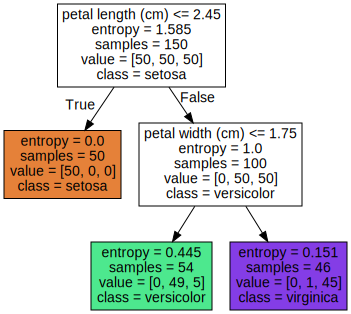

In [ ]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz
dot_tree = export_graphviz(tree_clf, feature_names = ['petal length (cm)', 'petal width (cm)'], class_names=iris.target_names, filled = True)
plotted_tree = graphviz.Source(dot_tree, format='png')
plotted_tree

## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

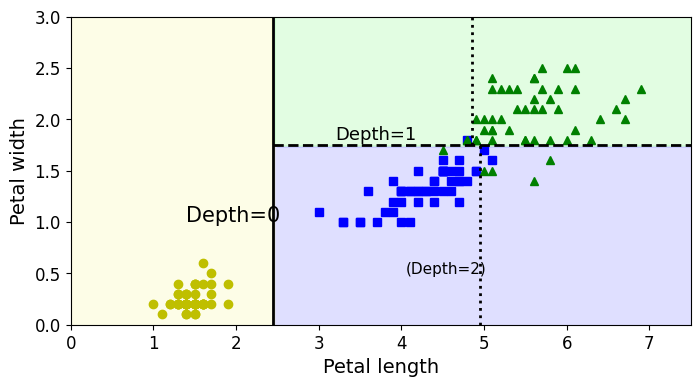

In [ ]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. The entropy at the root is = 1.585, at the left node it is = 0, and at the right node it is = 1. At the root entropy is > 1, which is possible only if the information is not measured in bits (0,1), so the base of the log is no longer = 2. If a different measurement unit for information is used, the maximum entropy is no longer 1 but = log k to the base of number of events the unit can encode, which is 3 in this case. At the left node, the entropy is = 0 as the petal length feature perfectly divides the three classes at the rows where it is <=2.45. At the right node, the entropy is maximum (once again we are back to using bits as our information measurement unit as we have only two events to classify), and is = 1, as exactly half the rows where petal length is > 2.45 are of one class and the second half are of the other.

2. In general, not setting the max_depth can lead to bigger unpruned trees with great memory consumption and high traversing time complexity as the tree keeps expanding until all leaves perfectly classify the data. This can be catastrophic on big data sets and might lead to overfitting. However, setting the max_depth too low can cause underfitting. In this dataset, as shown in the plots (see next cells), max_depth=1 causes the model to underfit, and max_depth=10 causes it to overfit. max_depth=2 is just right as it gives a high accuracy and lower time complexity and memory consumption. In general, we need a middle ground for the max_depth property that can be reached by trial and error or cross validation.

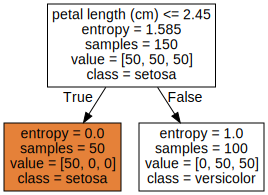

In [ ]:
####### YOUR CODE HERE
clf = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
clf.fit(X, y)
dot_tree = export_graphviz(clf, feature_names = ['petal length (cm)', 'petal width (cm)'], class_names=iris.target_names, filled = True)
plotted_tree = graphviz.Source(dot_tree, format='png')
plotted_tree


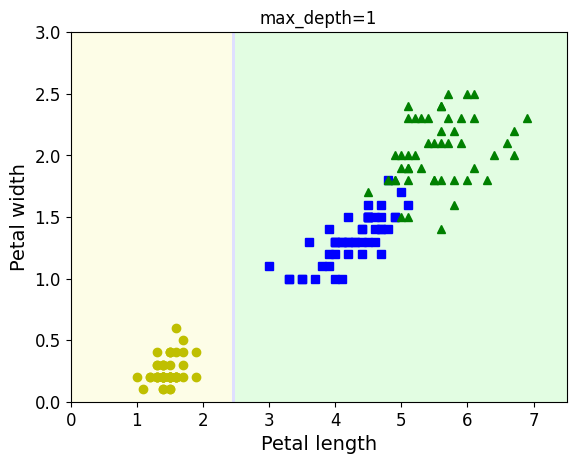

In [ ]:
####### YOUR CODE HERE
plt.title("max_depth=1")
plot_decision_boundary(clf,X,y)



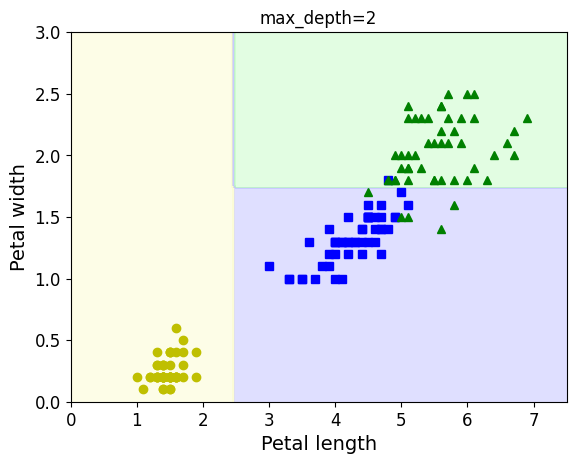

In [ ]:
clf2 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
trained_depth2= clf2.fit(X,y)

plt.title("max_depth=2")

plot_decision_boundary(clf2,X,y)

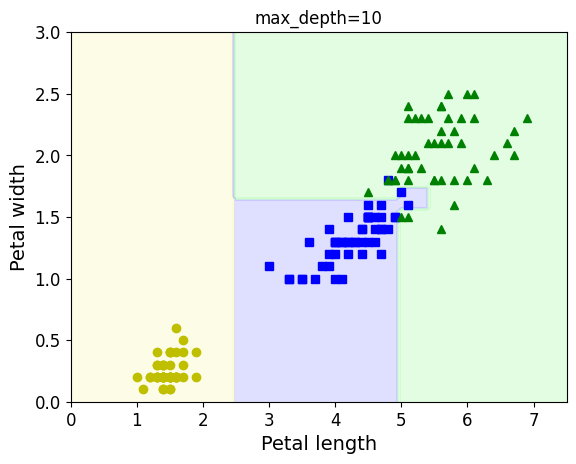

In [ ]:

clf10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
clf10.fit(X,y)
plt.title("max_depth=10")

plot_decision_boundary(clf10,X,y)

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. At the root node we ask is 5<=2.45? Then go to the False branch, where we ask is 1.5<=1.75? Then go to the True branch. There, we have samples of [0,49,5] where each index represents a class. So, for the first class p = 0/54 =0, for the second class p = 49/54 = 0.907, and for the third class p = 5/54 = 0.09, which are the same results as those obtained from the predict_proba function.


In [ ]:
######### Your code for (2.)
trained_depth2.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

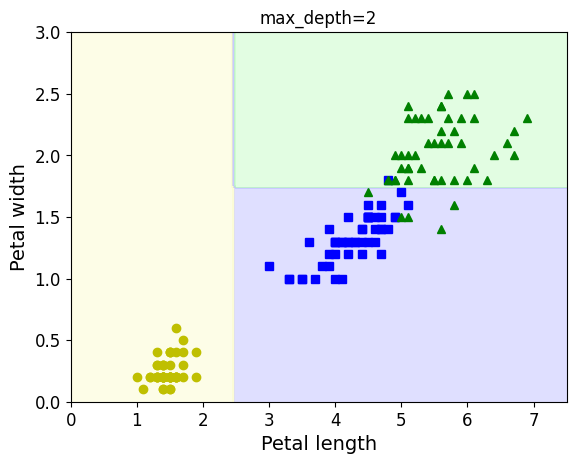

In [ ]:
##### YOUR CODE HERE
clf2 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
trained_depth2= clf2.fit(X,y)

plt.title("max_depth=2")

plot_decision_boundary(clf2,X,y)

The following cell rotates the data by angle 20

In [ ]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Score on training data =  0.9733333333333334


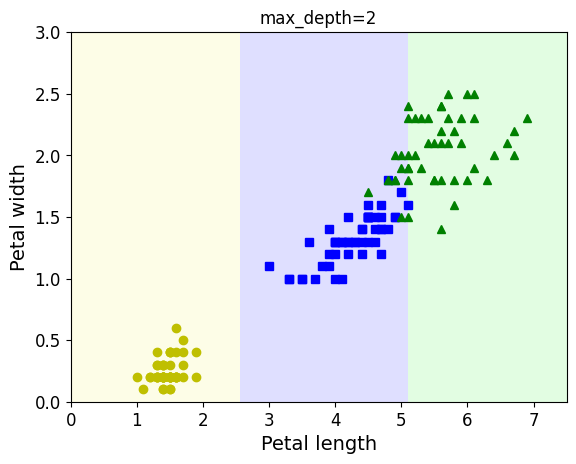

In [ ]:
##### YOUR CODE HERE
clf2 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
trained_depth2= clf2.fit(Xr,y)

plt.title("max_depth=2")

plot_decision_boundary(clf2,X,y)
print("Score on training data = ",clf2.score(Xr,y))



### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [ ]:
import numpy as np
def plot_logistic_regression(clf, X, y, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Score on training data= 0.9666666666666667


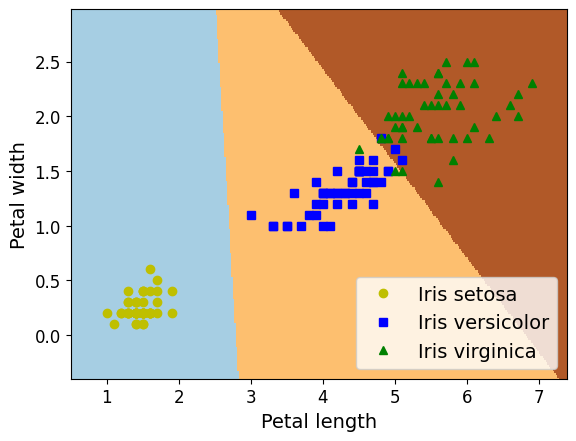

In [ ]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X,y)
print("Score on training data=",clf.score(X,y))

plot_logistic_regression(clf,X,y)

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Score on training data= 0.9666666666666667


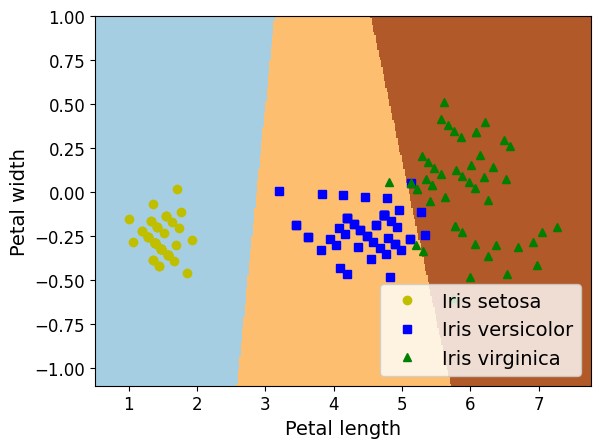

In [ ]:
###### YOUR CODE HERE
clf_rotated = LogisticRegression(random_state=0)
clf_rotated.fit(Xr,y)
print("Score on training data=",clf_rotated.score(Xr,y))

plot_logistic_regression(clf_rotated,Xr,y)

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. The decision tree model scored a bit higher accuracy by rotating the data, while the logistic regression model gave the same exact accuracy as that obtained from the original data.

2. Due to the different decision boundaries, while decision trees divide the data into smaller data sections with each split, logistic regression uses lines to divide the data. This linear property of decision boundaries in logistic regression results in rotated decision boundaries by the same angle with which the data is rotated, however, in decision trees since the decision boundaries are decided with each split, they do not all rotate by the same angle with which the data is rotated, so they are affected by this rotation while logistic regression models are not.



## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
X, y = make_moons(n_samples=10000, noise=0.4, random_state=0)

2. Split it into a training set and a test set using train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier.
    - Choose reasonable values for each hyperparameter.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(1,16)),'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=0), params, n_jobs=-1, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4410 candidates, totalling 13230 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=14, random_state=0)

4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [ ]:
# Since the refit parameter is by default = True, the model is refit to the best estimated hyperparameters, so we don't need to train it again.
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8675

## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. The model with max_depth=2 underfits while the other clearly overfits. We can see how the max_depth=5 model spikes downwards many times to fit an outlier, for example around points 0 and 2. We can also see how the max_depth=2 model is too simple and does not learn quite enough from the given data. Seeing as the data takes a sinusoidal curvature, polynomial linear regression would be a better model instead of decision trees. However, if we were to fit a decision tree model to the data, we would need a max_depth of 3 or 4, and considering that the max_depth=2 model already formed a rectangular curve, I think max_depth=3 would be more suitable.

2. The model with max_depth=5 has a higher variance error because the predicted data are closer to the true value but far away from each other.

3. The model with max_depth=2 has a higher bias error because the predicted data points are closer to each other but far away from the true value.

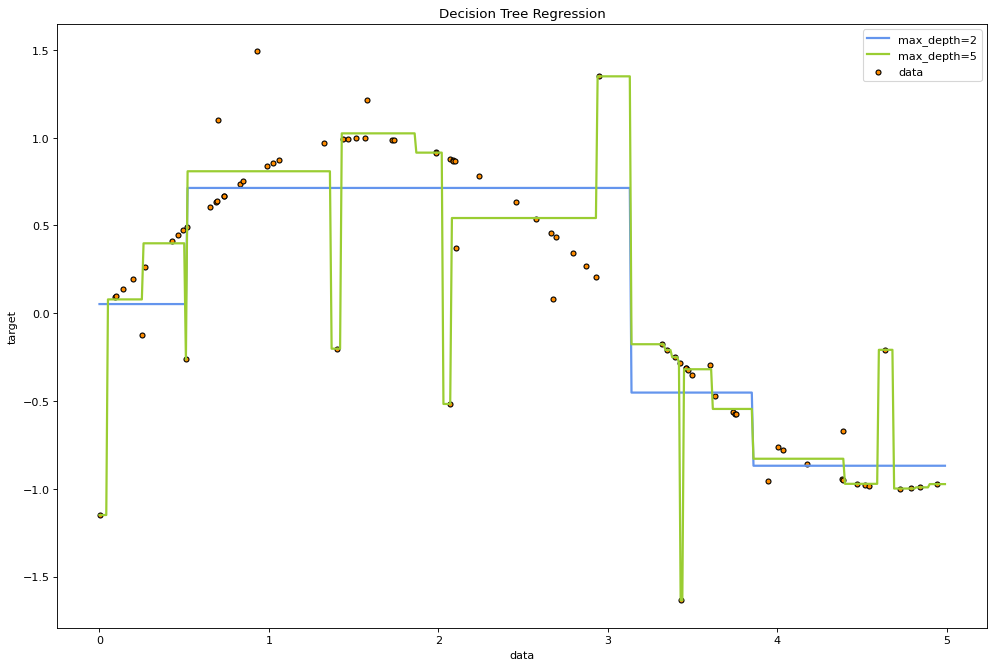

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()